In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import spacy
nlp = spacy.load("en_core_web_lg")

In [2]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.read_csv("final.csv")

In [4]:
df

,Text,Resume,skills,Name,experience,YearExp
0,Anubhav Kumar Singh To work in a globally com...,peoplesoft,Hcm,Anubhav Kumar,Good experience in job scheduling via crontab ...,4.0
1,Profile Summary: 7+ years of experience in im...,peoplesoft,"Dba, Hcm",Profile Summary,Skilled with the capability to analyse & inter...,7.0
2,PeopleSoft Database Administrator Gangareddy P...,peoplesoft,"Dba, Sql, Hcm",PeopleSoft Database,Experience in Report Management and Monitoring...,4.0
3,Murali Experience Summary I have 6 years of ex...,peoplesoft,Hcm,PeopleSoft Administration,"Experience in DPKs installations., Experience ...",6.0
4,"Priyanka Ramadoss 61/46, MountPleasant, Coonoo...",peoplesoft,Peoplesoft admin,Priyanka Ramadoss,Profile Summary An Adept IT professional with ...,4.0
...,...,...,...,...,...,...
74,Workday Integration Consultant Name : Sri Kri...,workday,"Core connectors, Xml, Workday, Hcm, Xslt, Eib",Workday Integration,"Experienced in developing Custom Reports, Adva...",4.0
75,Seeking suitable positions in Workday HCM as T...,workday,"Core connectors, Xml, Core hcm, Workday, Hcm, ...",Workday HCM,Having 4+ years of experience in ERP Experienc...,4.0
76,WORKDAY | HCM | FCM Name : Kumar S.S Role : W...,workday,"Core connectors, Xml, Core hcm, Workday, Hcm, ...",FCM Name,Experienced to work with Workday Report Writer...,6.0
77,Venkateswarlu.B Workday Consultant Having 5.3 ...,workday,"Xml, Workday, Hcm, Xslt, Eib",Workday HCM,"Having good experience in Workday Core HCM, re...",5.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Text        79 non-null     object 
 1   Resume      79 non-null     object 
 2   skills      77 non-null     object 
 3   Name        79 non-null     object 
 4   experience  75 non-null     object 
 5   YearExp     79 non-null     float64
dtypes: float64(1), object(5)
memory usage: 3.8+ KB


In [6]:
df.duplicated().sum()

2

In [7]:
df[df.duplicated(keep = False)]

,Text,Resume,skills,Name,experience,YearExp
31,Ui-Developer/ React JS Developer NAME: KRISHN...,react developer,"Node.js, Js, Xml, Javascript, Html, Css",Developer/ React,Extensive experience in developing web pages u...,3.2
32,Ui-Developer/ React JS Developer NAME: KRISHN...,react developer,"Node.js, Js, Xml, Javascript, Html, Css",Developer/ React,Extensive experience in developing web pages u...,3.2
37,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...,react developer,"Js, Mysql, Css, Html, Javascript",BABU PROFESSIONAL,Around 2 years of experience in software desig...,2.0
38,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...,react developer,"Js, Mysql, Css, Html, Javascript",BABU PROFESSIONAL,Around 2 years of experience in software desig...,2.0


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.isna().sum()

Text          0
Resume        0
skills        2
Name          0
experience    4
YearExp       0
dtype: int64

In [10]:
def cleanResume(resumeText):
    if pd.isnull(resumeText) or not isinstance(resumeText, str):
        return ''
    #resumeText = re.sub(r'\d+', '', resumeText)
    resumeText = re.sub('•', '',resumeText)
    resumeText = re.sub(r'\s+', ' ', resumeText).strip()
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
df['Text'] = df.Text.apply(lambda x: cleanResume(x))
df['experience'] = df.experience.apply(lambda x: cleanResume(x))
df["skills"] = df.skills.apply(lambda x:cleanResume(x))

In [11]:
def cleanspacy(text):
    doc = nlp(text)
    
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
        
    return " ".join(filtered_tokens)    

In [12]:
df["cleantext"] = df.Text.apply(lambda x:cleanspacy(x))
df["experience"] = df.experience.apply(lambda x:cleanspacy(x))

In [13]:
df.to_csv("ForDeployement.csv")

In [53]:
df.head()

,Text,Resume,skills,Name,experience,YearExp,cleantext,length
0,Anubhav Kumar Singh To work in a globally comp...,peoplesoft,Hcm,Anubhav Kumar,good experience job scheduling crontab IBM Tiv...,4.0,Anubhav Kumar Singh work globally competitive ...,6777
1,Profile Summary 7 years of experience in imple...,peoplesoft,Dba Hcm,Profile Summary,skille capability analyse interpret unique pro...,7.0,profile summary 7 year experience implement up...,6978
2,PeopleSoft Database Administrator Gangareddy P...,peoplesoft,Dba Sql Hcm,PeopleSoft Database,experience Report Management monitor Batch Env...,4.0,PeopleSoft Database Administrator Gangareddy p...,5748
3,Murali Experience Summary I have 6 years of ex...,peoplesoft,Hcm,PeopleSoft Administration,experience dpk installation experience set Cli...,6.0,Murali experience summary 6 year experience wo...,3802
4,Priyanka Ramadoss 61 46 MountPleasant Coonoor ...,peoplesoft,Peoplesoft admin,Priyanka Ramadoss,profile summary Adept professional 4 11 year S...,4.0,Priyanka Ramadoss 61 46 MountPleasant Coonoor ...,3509


# Count of Resumes

In [24]:
df["Resume"].value_counts()

react developer    22
workday            21
peoplesoft         20
sql developer      14
Name: Resume, dtype: int64

<Axes: xlabel='Resume', ylabel='count'>

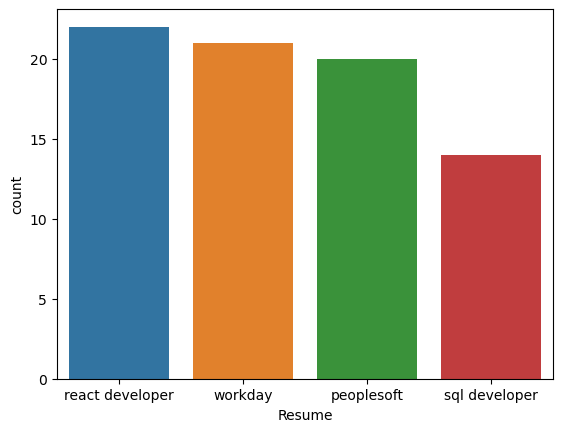

In [25]:
sns.countplot(x = df["Resume"],order = df["Resume"].value_counts().index)

# Distribution of Resume length

Text(0.5, 1.0, 'Resume length distribution')

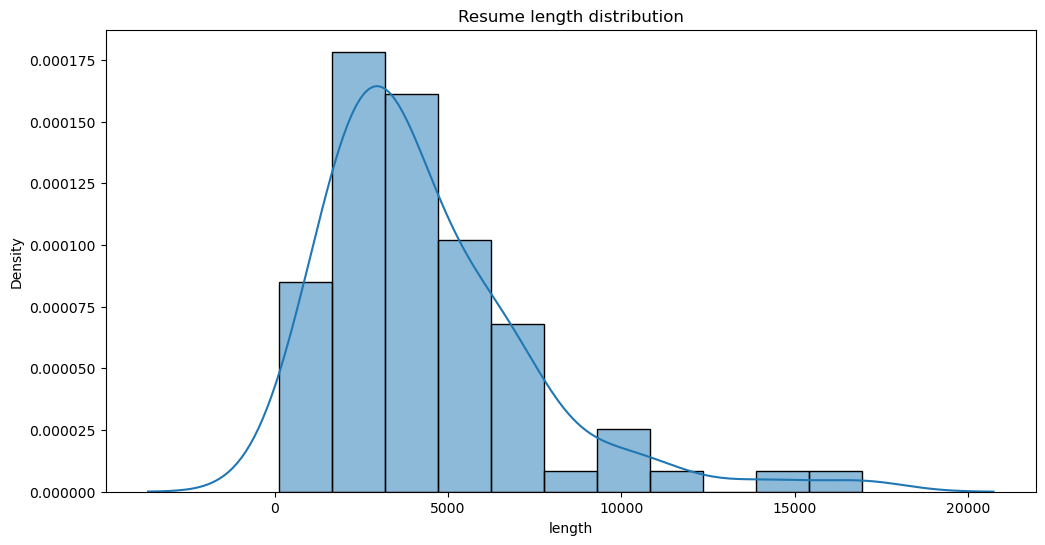

In [26]:
df['length'] = df['Text'].str.len()
plt.figure(figsize=(12,6))
sns.histplot(df['length'], kde=True,
    stat="density", kde_kws=dict(cut=3)).set_title('Resume length distribution')

# Most Frequent words in Resumes

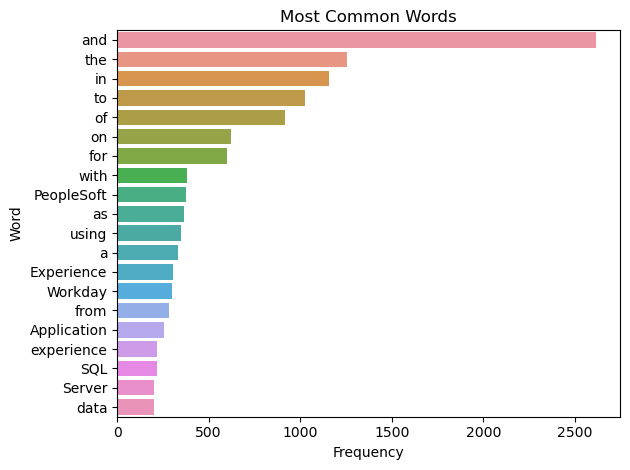

In [27]:
combined_text = " ".join(df["Text"].tolist())
tokens = combined_text.split()

word_freq = Counter(tokens)

# Get the most common words and their frequencies
most_common_words = word_freq.most_common(20)
words, frequencies = zip(*most_common_words)

# Create a DataFrame from the most common words
df_word_freq = pd.DataFrame({"Word": words, "Frequency": frequencies})

sns.barplot(data=df_word_freq, x="Frequency", y="Word")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.title("Most Common Words")
plt.tight_layout()
plt.show()

- without Stopword

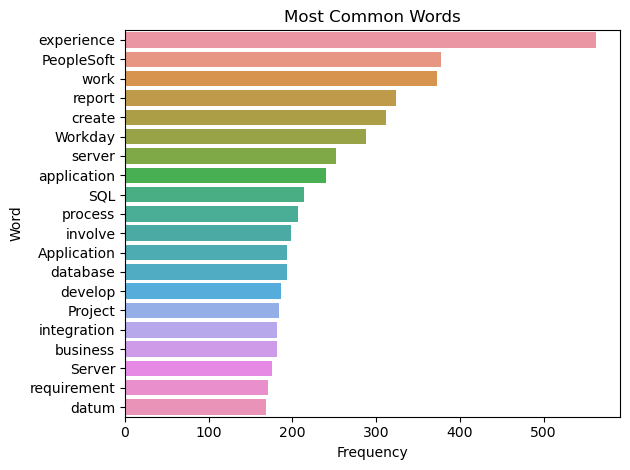

In [28]:
combined_text = " ".join(df["cleantext"].tolist())
tokens = combined_text.split()

word_freq = Counter(tokens)

# Get the most common words and their frequencies
most_common_words = word_freq.most_common(20)
words, frequencies = zip(*most_common_words)

# Create a DataFrame from the most common words
df_word_freq = pd.DataFrame({"Word": words, "Frequency": frequencies})

sns.barplot(data=df_word_freq, x="Frequency", y="Word")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.title("Most Common Words")
plt.tight_layout()
plt.show()

# WordCloud
- with stopword

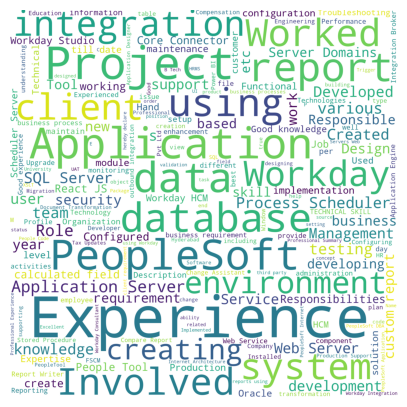

In [29]:
ttext = ' '.join(df["Text"].tolist())
Q_wordcloud=WordCloud(
                    background_color='White',
                    width=2000,
                    height=2000
                   ).generate(ttext)
fig = plt.figure(figsize = (5, 10))
plt.axis('off')
plt.imshow(Q_wordcloud)

# wordcloud without stopword

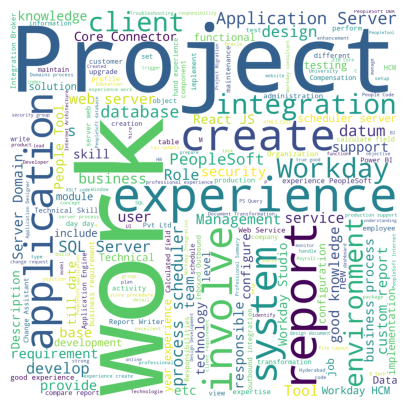

In [30]:
ttext = ' '.join(df["cleantext"].tolist())
Q_wordcloud=WordCloud(
                    background_color='White',
                    width=2000,
                    height=2000
                   ).generate(ttext)
fig = plt.figure(figsize = (5, 10))
plt.axis('off')
plt.imshow(Q_wordcloud)

In [31]:
workday = df[df["Resume"]=="workday"]
react = df[df["Resume"]=="react developer"]
peoplesoft = df[df["Resume"]=="peoplesoft"]
sql = df[df["Resume"]=="sql developer"]

In [32]:
workday_text_len = workday["cleantext"].str.len()
react_text_len = react["cleantext"].str.len()
peoplesoft_text_len = peoplesoft["cleantext"].str.len()
sql_text_len = sql["cleantext"].str.len()

In [33]:
workday_text = workday.cleantext.values
react_text = react.cleantext.values
peoplesoft_text = peoplesoft.cleantext.values
sql_text = sql.cleantext.values

In [34]:
def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'White').generate(str(text))
    fig = plt.figure(
        figsize = (5, 5))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

workday Resume most common word

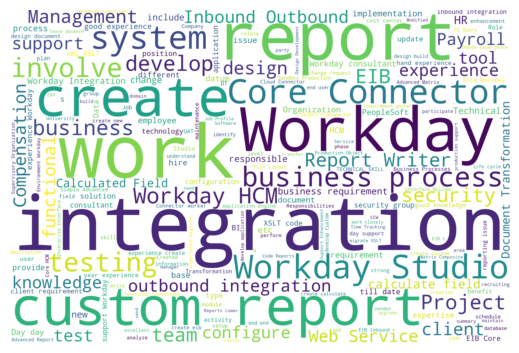

In [35]:
generate_word_cloud(workday_text)

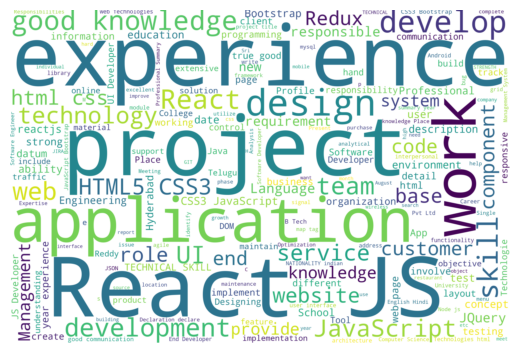

In [36]:
generate_word_cloud(react_text)

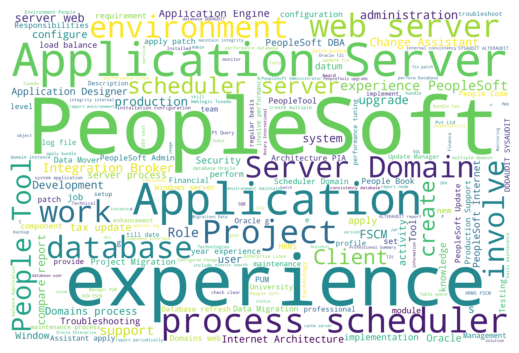

In [37]:
generate_word_cloud(peoplesoft_text)

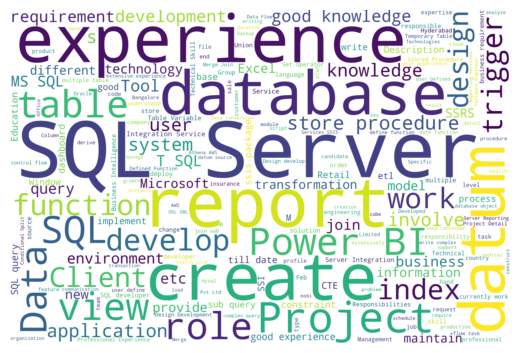

In [38]:
generate_word_cloud(sql_text)

In [39]:
def get_ngrams(text, ngram_from=2, ngram_to=2, n=None, max_features=20000):
    
    vec = CountVectorizer(ngram_range = (ngram_from, ngram_to), 
                          max_features = max_features, 
                          stop_words='english').fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, i]) for word, i in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
   
    return words_freq[:n]

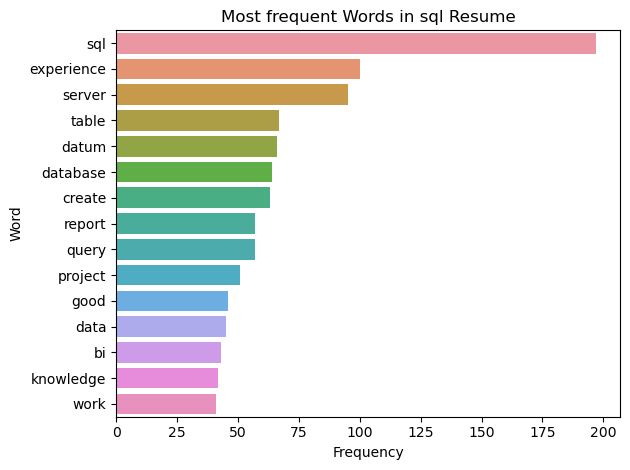

In [48]:
unigrams = get_ngrams(sql['cleantext'], ngram_from=1, ngram_to=1, n=15)
unigrams_df = pd.DataFrame(unigrams)
unigrams_df.columns=["Unigram", "Frequency"]
sns.barplot(data=unigrams_df, x="Frequency", y="Unigram")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.title("Most frequent Words in sql Resume")
plt.tight_layout()
plt.show()

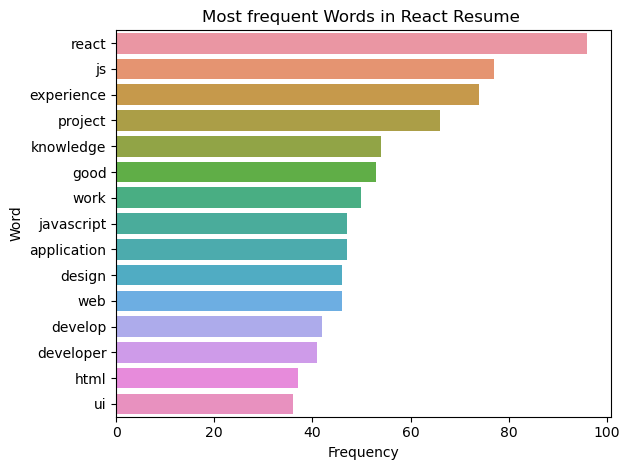

In [49]:
unigrams = get_ngrams(react['cleantext'], ngram_from=1, ngram_to=1, n=15)
unigrams_df = pd.DataFrame(unigrams)
unigrams_df.columns=["Unigram", "Frequency"]
sns.barplot(data=unigrams_df, x="Frequency", y="Unigram")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.title("Most frequent Words in React Resume ")
plt.tight_layout()
plt.show()

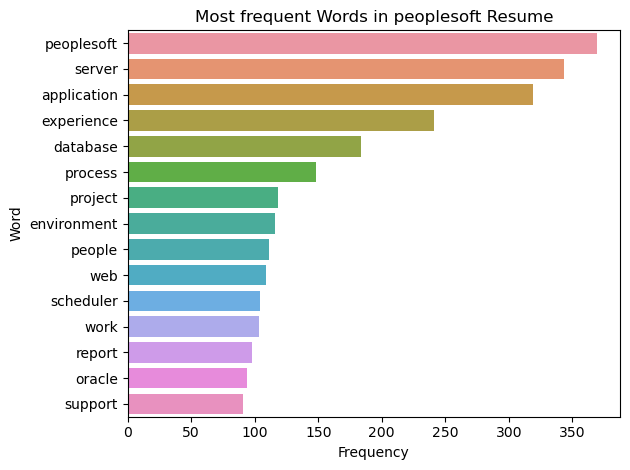

In [50]:
unigrams = get_ngrams(peoplesoft['cleantext'], ngram_from=1, ngram_to=1, n=15)
unigrams_df = pd.DataFrame(unigrams)
unigrams_df.columns=["Unigram", "Frequency"]
sns.barplot(data=unigrams_df, x="Frequency", y="Unigram")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.title("Most frequent Words in peoplesoft Resume")
plt.tight_layout()
plt.show()

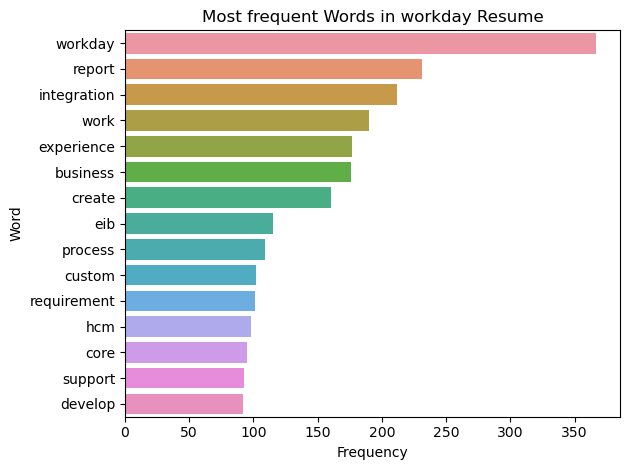

In [51]:
unigrams = get_ngrams(workday['cleantext'], ngram_from=1, ngram_to=1, n=15)
unigrams_df = pd.DataFrame(unigrams)
unigrams_df.columns=["Unigram", "Frequency"]
sns.barplot(data=unigrams_df, x="Frequency", y="Unigram")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.title("Most frequent Words in workday Resume")
plt.tight_layout()
plt.show()

# N-gram Word

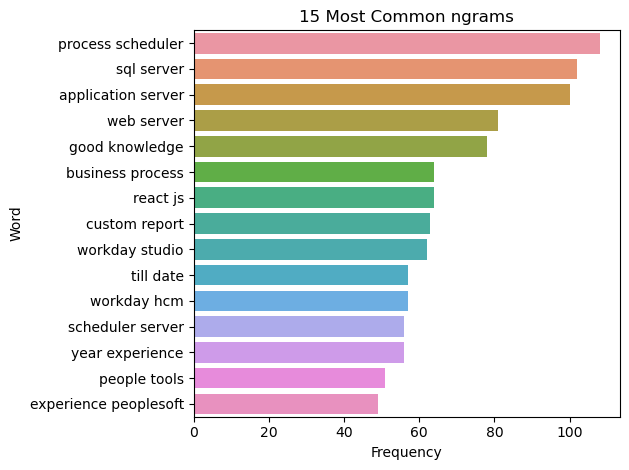

In [44]:
unigrams = get_ngrams(df['cleantext'], ngram_from=2, ngram_to=2, n=15)
unigrams_df = pd.DataFrame(unigrams)
unigrams_df.columns=["Unigram", "Frequency"]
sns.barplot(data=unigrams_df, x="Frequency", y="Unigram")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.title("15 Most Common ngrams")
plt.tight_layout()
plt.show()

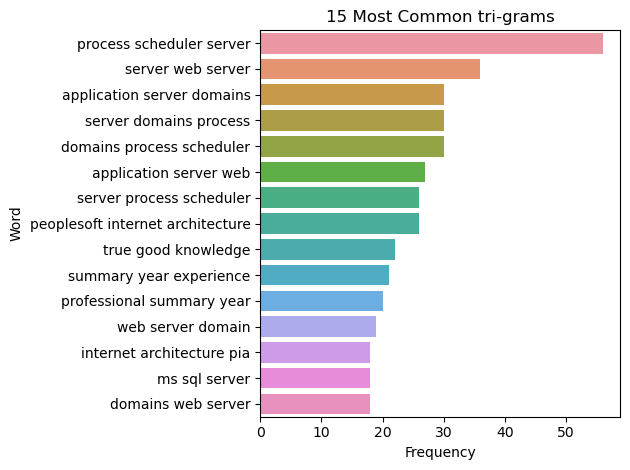

In [45]:
unigrams = get_ngrams(df['cleantext'], ngram_from=3, ngram_to=3, n=15)
unigrams_df = pd.DataFrame(unigrams)
unigrams_df.columns=["Unigram", "Frequency"]
sns.barplot(data=unigrams_df, x="Frequency", y="Unigram")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.title("15 Most Common tri-grams")
plt.tight_layout()
plt.show()

# Bag of Word

In [54]:
v = CountVectorizer()
v.fit(df["cleantext"])
v.vocabulary_

{'anubhav': 306,
 'kumar': 1894,
 'singh': 3097,
 'work': 3710,
 'globally': 1478,
 'competitive': 729,
 'environment': 1213,
 'challenge': 636,
 'assignment': 368,
 'shall': 3055,
 'yield': 3748,
 'twin': 3506,
 'benefit': 474,
 'job': 1833,
 'satisfaction': 2964,
 'steady': 3233,
 'paced': 2390,
 'professional': 2629,
 'growth': 1522,
 'experience': 1281,
 '06': 11,
 '2019': 75,
 'current': 890,
 'hcl': 1562,
 'role': 2924,
 'system': 3331,
 'admin': 201,
 'offshore': 2307,
 'skills': 3110,
 'shell': 3063,
 'script': 2999,
 'linux': 1962,
 'peoplesoft': 2463,
 'administration': 206,
 'github': 1470,
 'managing': 2031,
 'hcm': 1563,
 'fscm': 1415,
 'production': 2624,
 'support': 3305,
 'instal': 1739,
 'windows': 3698,
 'os': 2362,
 'involve': 1796,
 'day': 927,
 'activity': 185,
 'project': 2644,
 'migration': 2123,
 'database': 917,
 'refresh': 2807,
 'change': 638,
 'tax': 3359,
 'update': 3541,
 'etc': 1242,
 'troubleshooting': 3496,
 'server': 3035,
 'like': 1949,
 'application'

In [69]:
v = CountVectorizer()
x=v.fit_transform(df["cleantext"])
count = x.toarray()
bog = pd.DataFrame(count,columns = v.get_feature_names_out())
bog.head()

,006,01,016,017,02,03,032,04,04th,05,...,yearly,yield,yii,yogi,yonder,york,yr,zenefit,zero,zp
0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# N-grams word

In [55]:
v = CountVectorizer(ngram_range=(1,3))
v.fit(df["cleantext"])
v.vocabulary_

{'anubhav': 2893,
 'kumar': 23694,
 'singh': 38232,
 'work': 45929,
 'globally': 18380,
 'competitive': 7776,
 'environment': 14990,
 'challenge': 6427,
 'assignment': 3808,
 'shall': 38008,
 'yield': 47286,
 'twin': 43794,
 'benefit': 4772,
 'job': 22807,
 'satisfaction': 36308,
 'steady': 39802,
 'paced': 28742,
 'professional': 31760,
 'growth': 18811,
 'experience': 15817,
 '06': 73,
 '2019': 983,
 'current': 9997,
 'hcl': 19129,
 'role': 35870,
 'system': 40826,
 'admin': 2093,
 'offshore': 27880,
 'skills': 38472,
 'shell': 38052,
 'script': 36683,
 'linux': 24472,
 'peoplesoft': 29459,
 'administration': 2160,
 'github': 18286,
 'managing': 25539,
 'hcm': 19132,
 'fscm': 17618,
 'production': 31621,
 'support': 40525,
 'instal': 21224,
 'windows': 45765,
 'os': 28522,
 'involve': 22179,
 'day': 11254,
 'activity': 1884,
 'project': 32078,
 'migration': 26182,
 'database': 10591,
 'refresh': 33927,
 'change': 6456,
 'tax': 41459,
 'update': 44271,
 'etc': 15380,
 'troubleshooting